In [602]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [603]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [604]:
dfBikes = pd.read_csv("day.csv")
dfBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Understanding the data through EDA

In [605]:
dfBikes.shape

(730, 16)

In [606]:
dfBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [607]:
dfBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


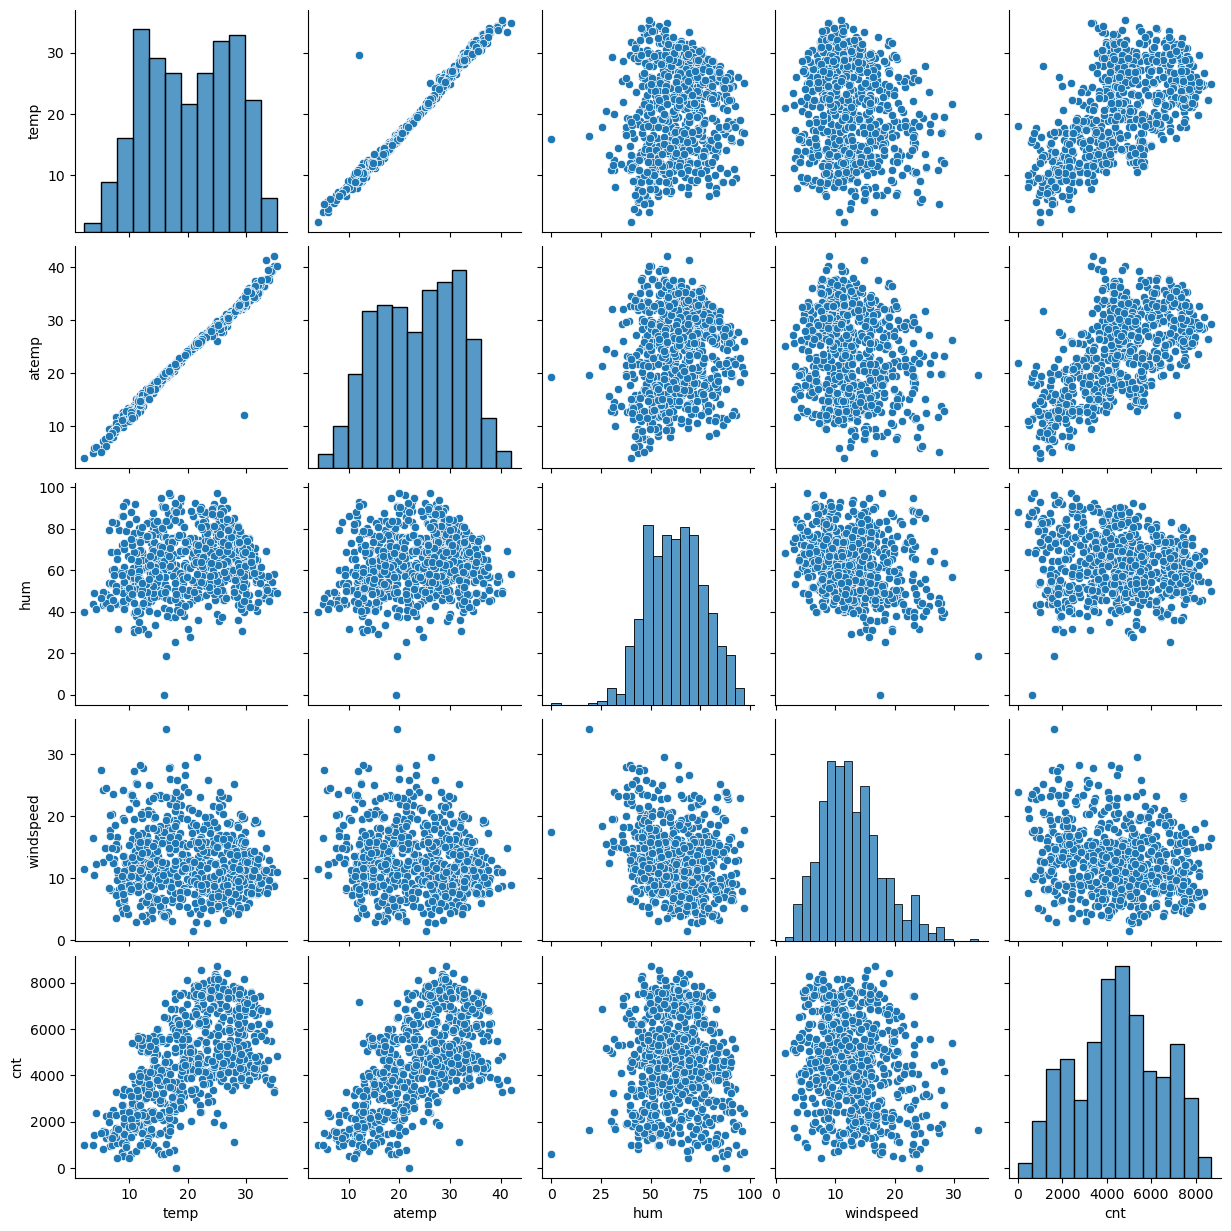

In [608]:
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed','cnt']

sns.pairplot(dfBikes[numerical_variables])
plt.show()

In [609]:

import calendar

dfBikes['season'] = dfBikes['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

dfBikes['weekday'] = dfBikes['weekday'].map({1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6:'saturday', 0: 'sunday'})

dfBikes['workingday'] = dfBikes['workingday'].map({1: 'workingday', 0: 'nonworkingday'})

dfBikes['holiday'] = dfBikes['holiday'].map({1: 'holiday', 0: 'nonholiday'})

dfBikes['weathersit'] = dfBikes['weathersit'].apply(lambda x: 'weathersit_' + str(x))

dfBikes['mnth'] = dfBikes['mnth'].apply(lambda x: calendar.month_abbr[x])

dfBikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,nonholiday,saturday,nonworkingday,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,nonholiday,sunday,nonworkingday,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,nonholiday,monday,workingday,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,nonholiday,tuesday,workingday,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,nonholiday,wednesday,workingday,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


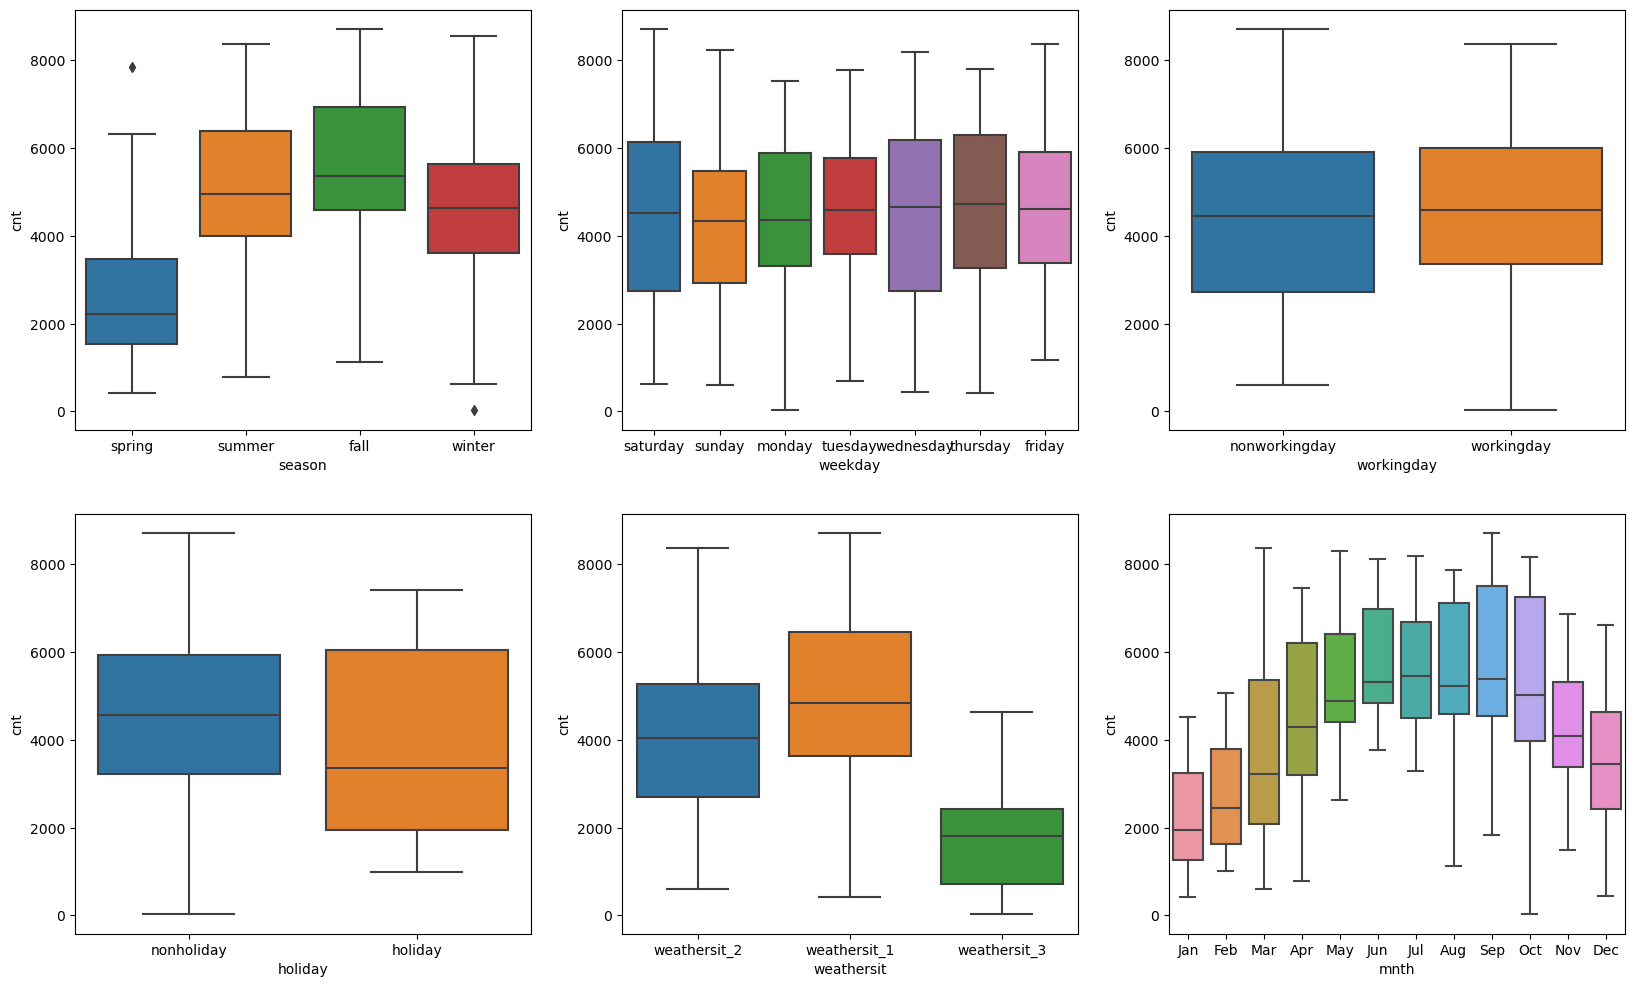

In [610]:
# Box plots for understanding the categorical data

#Utility function
def BoxPlotBikeData(rows, cols, index, columnName):
    plt.subplot(rows,cols,index)
    sns.boxplot(x = columnName, y = 'cnt', data = dfBikes)

plt.figure(figsize=(20,12))

BoxPlotBikeData(2,3,1, 'season')
BoxPlotBikeData(2,3,2, 'weekday')
BoxPlotBikeData(2,3,3, 'workingday')
BoxPlotBikeData(2,3,4, 'holiday')
BoxPlotBikeData(2,3,5, 'weathersit')
BoxPlotBikeData(2,3,6, 'mnth')

plt.show()

## Data Preparation

In [611]:
# Remove the unnecessary columns in data
dfBikes = dfBikes.drop(['instant','casual','registered', 'dteday'], axis=1)

dfBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,nonholiday,saturday,nonworkingday,weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,nonholiday,sunday,nonworkingday,weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,nonholiday,monday,workingday,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,nonholiday,tuesday,workingday,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,nonholiday,wednesday,workingday,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


In [612]:
# Replace Categorical Values with meaningful names

# import calendar

# dfBikes['season'] = dfBikes['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# dfBikes['weekday'] = dfBikes['weekday'].map({1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6:'saturday', 0: 'sunday'})

# dfBikes['workingday'] = dfBikes['workingday'].map({1: 'workingday', 0: 'nonworkingday'})

# dfBikes['holiday'] = dfBikes['holiday'].map({1: 'holiday', 0: 'nonholiday'})

# dfBikes['weathersit'] = dfBikes['weathersit'].apply(lambda x: 'weathersit_' + str(x))

# dfBikes['mnth'] = dfBikes['mnth'].apply(lambda x: calendar.month_abbr[x])

# dfBikes.head(5)

In [613]:
# Set the datatype of each column to be Categorical
# Replace the Categorical Variables with Dummy values

categorical_variables = ['season', 'weekday', 'workingday', 'holiday', 'weathersit', 'mnth']

for cat_var in categorical_variables:
    print('Setting dummy variables for ' + cat_var)

    dfBikes[cat_var] = dfBikes[cat_var].astype('category')

    cat_dummies_columns =  pd.get_dummies(dfBikes[cat_var], drop_first=True)

    dfBikes = pd.concat([dfBikes, cat_dummies_columns], axis=1)

    dfBikes.drop([cat_var], axis=1, inplace=True)

    print(dfBikes.head())

    print('------------------------------')


print('After replacing categorical variables with dummy values:')
print(dfBikes.head(10))

Setting dummy variables for season
   yr mnth     holiday    weekday     workingday    weathersit       temp  \
0   0  Jan  nonholiday   saturday  nonworkingday  weathersit_2  14.110847   
1   0  Jan  nonholiday     sunday  nonworkingday  weathersit_2  14.902598   
2   0  Jan  nonholiday     monday     workingday  weathersit_1   8.050924   
3   0  Jan  nonholiday    tuesday     workingday  weathersit_1   8.200000   
4   0  Jan  nonholiday  wednesday     workingday  weathersit_1   9.305237   

      atemp      hum  windspeed   cnt  spring  summer  winter  
0  18.18125  80.5833  10.749882   985       1       0       0  
1  17.68695  69.6087  16.652113   801       1       0       0  
2   9.47025  43.7273  16.636703  1349       1       0       0  
3  10.60610  59.0435  10.739832  1562       1       0       0  
4  11.46350  43.6957  12.522300  1600       1       0       0  
------------------------------
Setting dummy variables for weekday
   yr mnth     holiday     workingday    weathersit

In [614]:
dfBikes.shape

(730, 29)

## Split the data into Test & Train data sets       

In [615]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
dfBikes_train, dfBikes_test = train_test_split(dfBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [616]:
print(dfBikes_train.shape)

print(dfBikes_test.shape)

(510, 29)
(219, 29)


## Scale the features       

In [617]:
dfBikes_train[numerical_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.102429,23.493909,63.112926,12.831318,4486.382353
std,7.431169,8.090038,14.156632,5.291832,1952.158739
min,2.424346,3.953480,0.000000,2.834381,22.000000
25%,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,20.209597,24.020400,63.437500,12.083182,4530.000000
75%,26.615847,30.177700,73.250025,15.750879,5973.500000
max,35.328347,42.044800,97.041700,34.000021,8714.000000


In [618]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfBikes_train[numerical_variables] = scaler.fit_transform(dfBikes_train[numerical_variables])

In [619]:
dfBikes_train[numerical_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


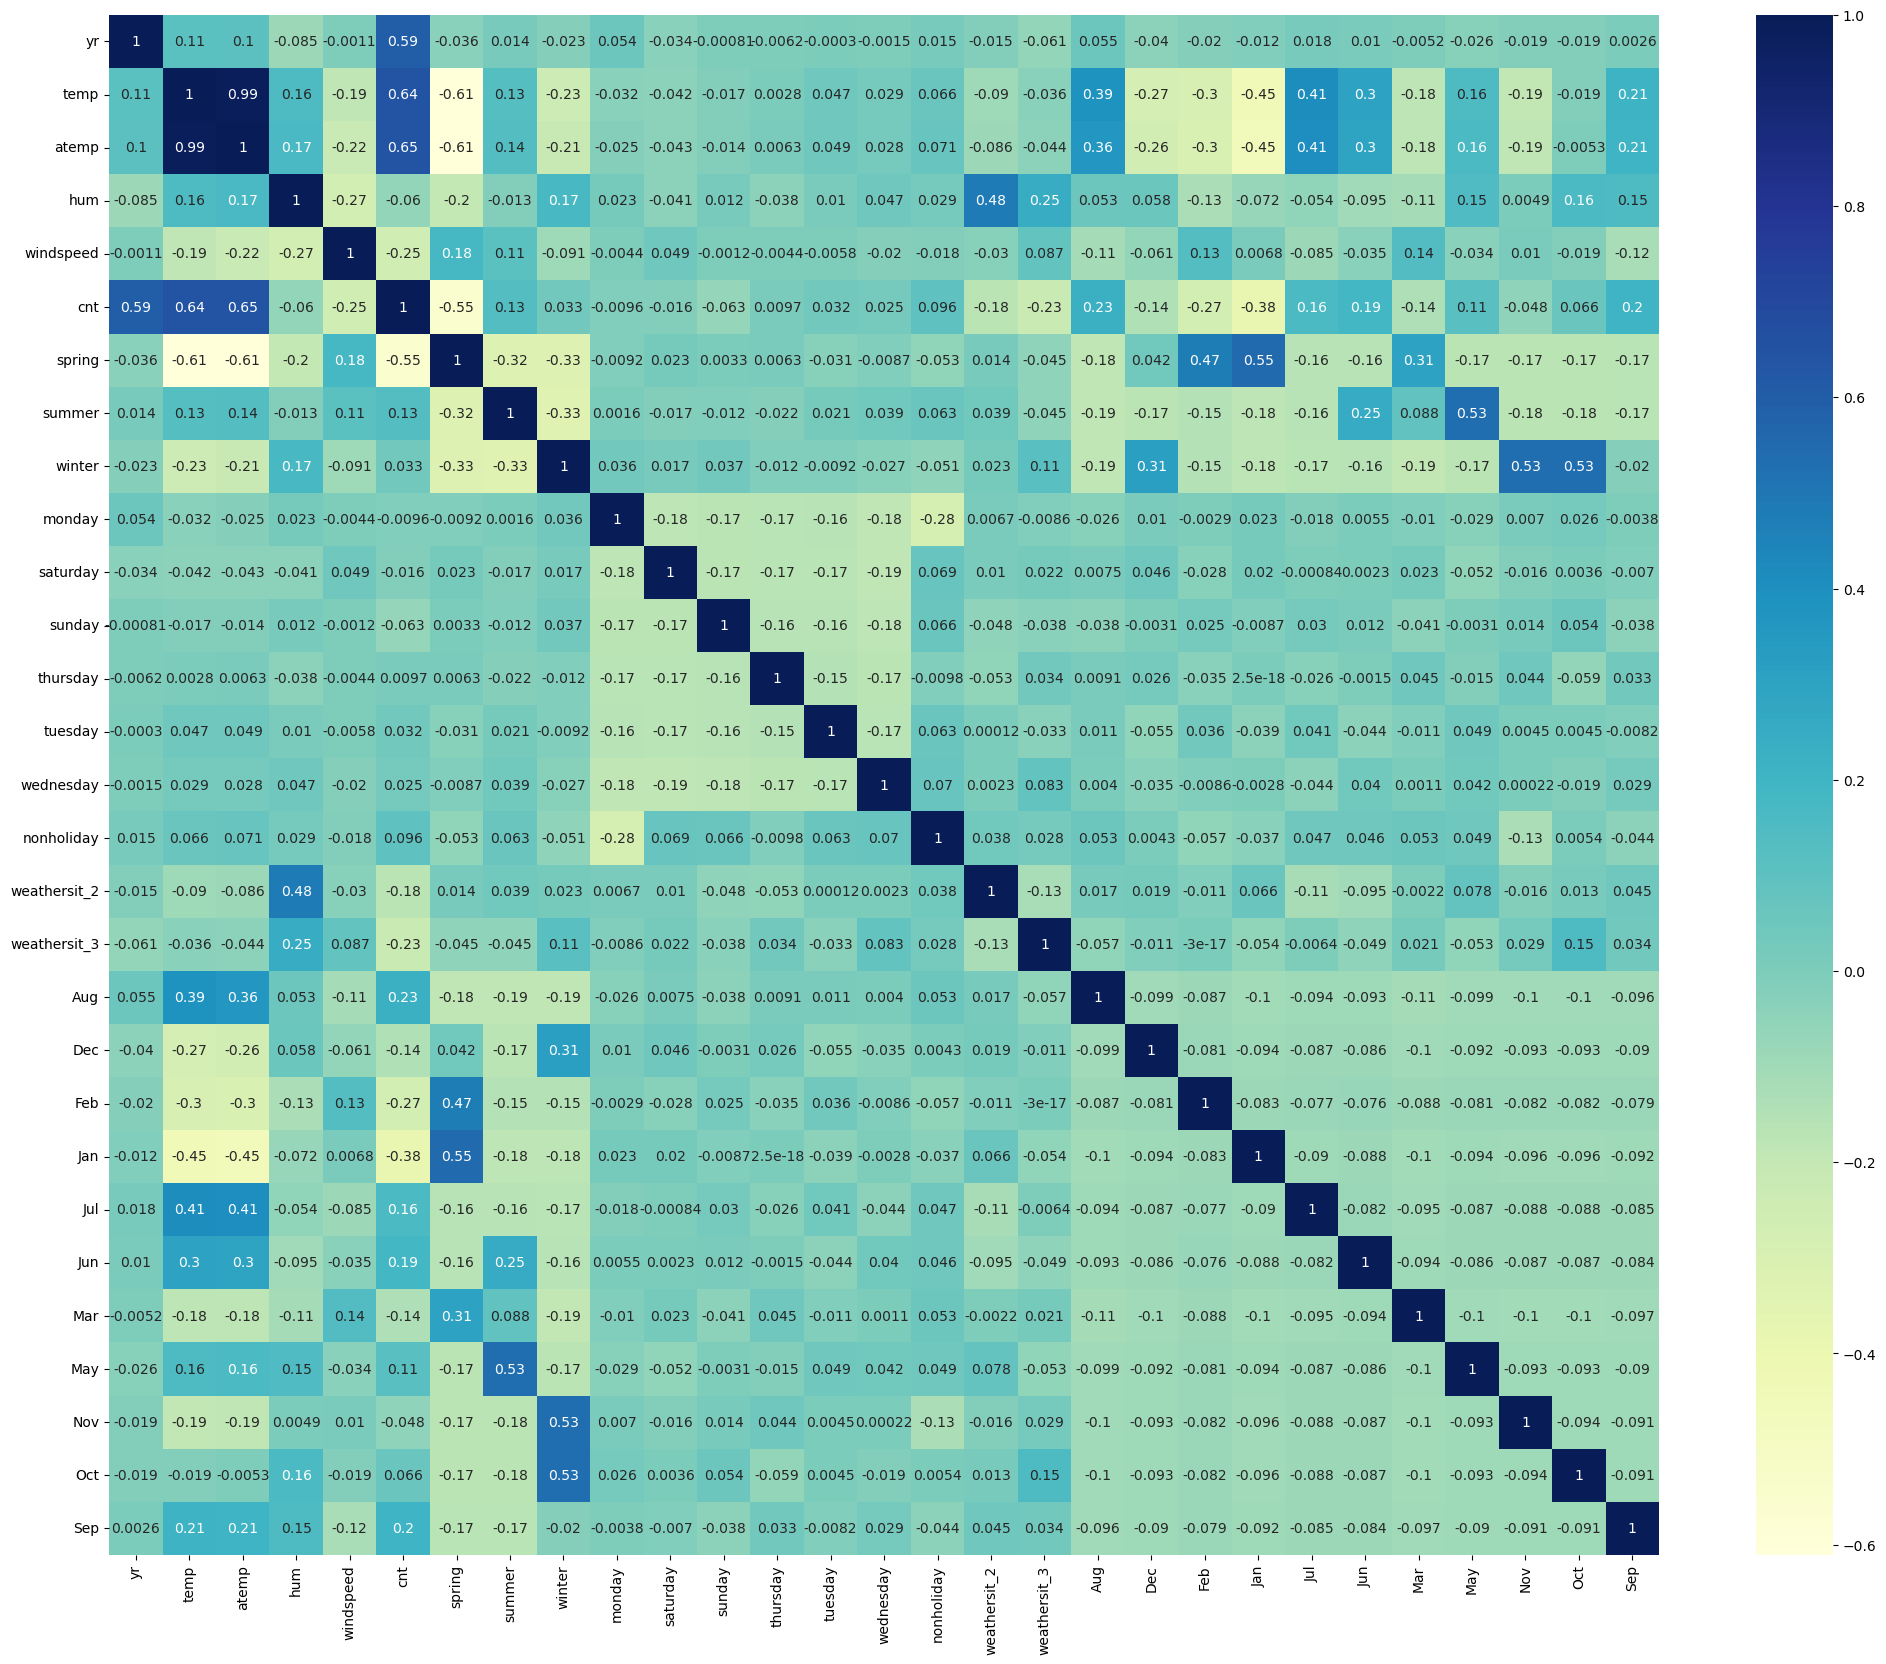

In [620]:
plt.figure(figsize = (25, 20))
sns.heatmap(dfBikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Building a Linear Model

### Utility functions to create and observe models

In [621]:
import statsmodels.api as sm

# Function to construct a linear model
def ConstructLinearRegressionModel(X_train, y_train):
    # Add a constant
    X_train_lm = sm.add_constant(X_train)

    # Create a first fitted model
    lrModel = sm.OLS(y_train, X_train_lm).fit()

    return lrModel

In [622]:
# Function to calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Model 1 - using all the variables

In [623]:
y_train = dfBikes_train.pop('cnt')

# The first model is containing all the columns
X_train_model_1 = dfBikes_train

X_train_model_1.head()

,yr,temp,atemp,hum,windspeed,spring,summer,winter,monday,saturday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [624]:
lr_model_1 = ConstructLinearRegressionModel(X_train_model_1, y_train)

print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          8.42e-181
Time:                        15:20:26   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2559      0.052      4.911   

In [625]:
Calculate_VIF(X_train_model_1)

        Features     VIF
1           temp  432.54
2          atemp  383.17
3            hum   39.74
14    nonholiday   32.29
5         spring   12.38
7         winter   12.18
6         summer    7.94
26           Oct    6.51
17           Aug    6.46
25           Nov    6.16
21           Jul    5.63
4      windspeed    5.56
20           Jan    5.49
18           Dec    5.16
27           Sep    4.56
19           Feb    4.11
23           Mar    3.53
22           Jun    3.07
24           May    2.45
15  weathersit_2    2.40
13     wednesday    2.28
9       saturday    2.23
8         monday    2.20
10        sunday    2.16
0             yr    2.15
11      thursday    2.07
12       tuesday    2.04
16  weathersit_3    1.32


### Model 2 - Remove "atemp"

Remove the variable "atemp" as it has high p-value and high VIF

In [ ]:
X_train_model_2 = X_train_model_1.drop('atemp', 1)

X_train_model_2.head()

In [ ]:
lr_model_2 = ConstructLinearRegressionModel(X_train_model_2, y_train)

print(lr_model_2.summary())

In [ ]:
Calculate_VIF(X_train_model_2)

### Model 3 - Remove Mar
Mar has a high p-value and can be removed

In [ ]:
X_train_model_3 = X_train_model_2.drop('Mar', 1)

X_train_model_3.head()

In [ ]:
lr_model_3 = ConstructLinearRegressionModel(X_train_model_3, y_train)

print(lr_model_3.summary())

In [ ]:
Calculate_VIF(X_train_model_3)

### Model 4 - Remove Saturday
Saturday has high p-value

In [ ]:
X_train_model_4 = X_train_model_3.drop('saturday', 1)

X_train_model_4.head()

In [ ]:
lr_model_4 = ConstructLinearRegressionModel(X_train_model_4, y_train)

print(lr_model_4.summary())

In [ ]:
Calculate_VIF(X_train_model_4)

### Model 5 - Remove October
October has high p-value

In [ ]:
X_train_model_5 = X_train_model_4.drop('Oct', 1)

X_train_model_5.head()

In [ ]:
lr_model_5 = ConstructLinearRegressionModel(X_train_model_5, y_train)

print(lr_model_5.summary())

In [ ]:
Calculate_VIF(X_train_model_5)

### Model 6 - Remove Jun
Jun has high p-value

In [638]:
X_train_model_6 = X_train_model_5.drop('Jun', 1)

X_train_model_6.head()

,yr,temp,hum,windspeed,spring,summer,winter,monday,sunday,thursday,...,weathersit_2,weathersit_3,Aug,Dec,Feb,Jan,Jul,May,Nov,Sep
653,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
lr_model_6 = ConstructLinearRegressionModel(X_train_model_6, y_train)

print(lr_model_6.summary())

In [ ]:
Calculate_VIF(X_train_model_6)

### Model 7 - remove Wednesday
Wednesday has high p-value

In [ ]:
X_train_model_7 = X_train_model_6.drop('wednesday', 1)

X_train_model_7.head()

In [ ]:
lr_model_7 = ConstructLinearRegressionModel(X_train_model_7, y_train)

print(lr_model_7.summary())

In [ ]:
Calculate_VIF(X_train_model_7)

### Model 8 - remove variable with high VIF - hum

In [ ]:
X_train_model_8 = X_train_model_7.drop('hum', 1)

X_train_model_8.head()

In [ ]:
lr_model_8 = ConstructLinearRegressionModel(X_train_model_8, y_train)
print(lr_model_8.summary())

In [ ]:
Calculate_VIF(X_train_model_8)

### Model 9 - Remove nonholiday - has high VIF

In [675]:
X_train_model_9 = X_train_model_8.drop('nonholiday', 1)

X_train_model_9.head()

,yr,temp,windspeed,spring,summer,winter,monday,sunday,thursday,tuesday,weathersit_2,weathersit_3,Aug,Dec,Feb,Jan,Jul,May,Nov,Sep
653,1,0.509887,0.300794,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0.815169,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0.245101,0.663106,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0.395666,0.188475,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [676]:
lr_model_9 = ConstructLinearRegressionModel(X_train_model_9, y_train)
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.76e-183
Time:                        15:32:03   Log-Likelihood:                 514.27
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     489   BIC:                            -897.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2797      0.037      7.653   

In [677]:
Calculate_VIF(X_train_model_9)

        Features    VIF
1           temp  11.58
3         spring   5.44
2      windspeed   4.82
4         summer   4.56
5         winter   4.21
12           Aug   2.94
16           Jul   2.73
15           Jan   2.28
0             yr   2.09
19           Sep   1.95
14           Feb   1.90
18           Nov   1.81
17           May   1.60
10  weathersit_2   1.60
13           Dec   1.57
6         monday   1.34
7         sunday   1.33
9        tuesday   1.31
8       thursday   1.31
11  weathersit_3   1.09


## Analysis

### Analysis of residual terms

In [681]:
X_train = sm.add_constant(X_train_model_8)
y_train_prediction = lr_model_8.predict(X_train)

Text(0.5, 0, 'Errors')

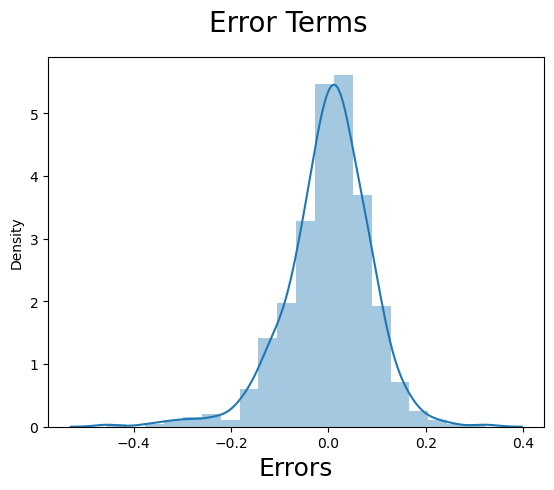

In [682]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_prediction), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Making prediction using model

In [683]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

dfBikes_test[num_vars] = scaler.transform(dfBikes_test[num_vars])

KeyError: "['cnt'] not in index"

In [ ]:
dfBikes_test.describe()

,yr,temp,atemp,hum,windspeed,cnt,spring,summer,winter,monday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.127854,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.334692,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Base function

from pandas import DataFrame
from statsmodels.regression.linear_model import RegressionResultsWrapper
from sklearn.metrics import r2_score

def EvaluateModelByPrediction(text, lrmodel: RegressionResultsWrapper, Xtest: DataFrame, Ytest: DataFrame):
    print(text)
    y_predicted = lrmodel.predict(Xtest)

    fig = plt.figure()
    # plt.scatter(Ytest, y_predicted)
    sns.regplot(x=Ytest, y=y_predicted, fit_reg=True,scatter_kws={'s':4, "color": "blue"}, line_kws={"color": "red"})
    fig.suptitle(text, fontsize = 20)              # Plot heading
    plt.xlabel('y_test', fontsize = 18)                          # X-label
    plt.ylabel('y_pred', fontsize = 16)
    plt.show()
         
    n = Xtest.shape[0]
    p = Xtest.shape[1]

    r2 =  r2_score(Ytest, y_predicted)
    print("R^2 Score: ", r2)

    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('Adjusted R^2: ', adjusted_r2)


In [ ]:
y_test = dfBikes_test.pop('cnt')
X_test = dfBikes_test

In [ ]:
# Evaluate Model 8

X_test_sm_8 = sm.add_constant(X_test)

columns_removed = ['atemp', 'Mar', 'saturday', 'Oct', 'hum', 'Jun', 'nonholiday']

X_test_sm_8 = X_test_sm_8.drop(columns_removed, axis = 1)

Evaluation of Model 8


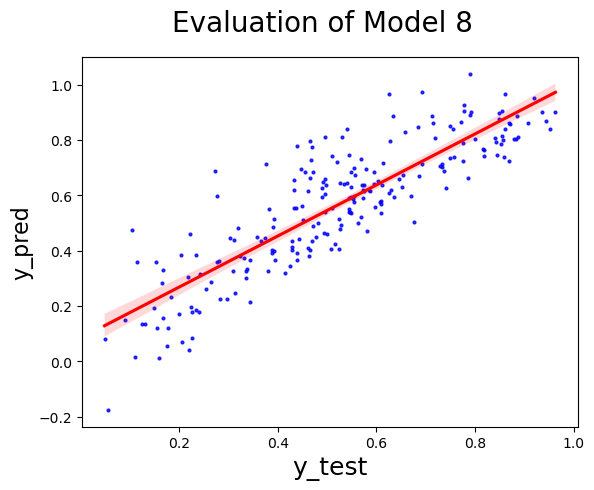

R^2 Score:  0.6666981240407102
Adjusted R^2:  0.6292866889840552


In [ ]:
EvaluateModelByPrediction('Evaluation of Model 8', lr_model_8, X_test_sm_8, y_test)

In [ ]:
# Evaluate Model 7

X_test_sm_7 = sm.add_constant(X_test)

columns_removed = ['atemp', 'Mar', 'saturday', 'Oct', 'hum', 'Jun']

X_test_sm_7 = X_test_sm_7.drop(columns_removed, axis = 1)

Evaluation of Model 7


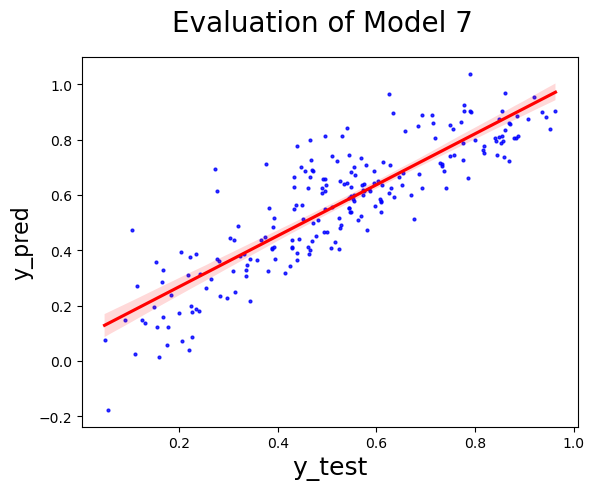

R^2 Score:  0.6786731322829759
Adjusted R^2:  0.6407730401932756


In [ ]:
EvaluateModelByPrediction('Evaluation of Model 7', lr_model_7, X_test_sm_7, y_test)

## Regression using RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(X_train_model_1, y_train)

rfe = RFE(lm, step=12)          # running RFE
rfe = rfe.fit(X_train_model_1, y_train)

In [ ]:
list(zip(X_train_model_1.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('monday', False, 3),
 ('saturday', False, 3),
 ('sunday', False, 2),
 ('thursday', False, 3),
 ('tuesday', False, 3),
 ('wednesday', False, 3),
 ('nonholiday', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('Aug', False, 3),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 3),
 ('Mar', False, 3),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1)]